![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [22]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

# Exploración del set de datos para entrenamiento

In [23]:
df = dataTraining

In [24]:
lineas= '='*100
print(lineas)
print("Registros y columnas del set de datos:")
print(df.shape)
print(lineas)
print("Metadatos del set de datos:")
print(df.info())
print(lineas)
print("Descripción del set de datos:")
print(df.describe())
print(lineas)
print("Validación de datos faltantes en el set de datos")
print(df.isnull().sum().to_frame().rename(columns={0:"Total No. Faltantes"}))
print(lineas)
print("Validación de duplicados en el set de datos")
print("Registros duplicados:",df.duplicated().sum())

Registros y columnas del set de datos:
(7895, 5)
Metadatos del set de datos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7895 entries, 3107 to 215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    7895 non-null   int64  
 1   title   7895 non-null   object 
 2   plot    7895 non-null   object 
 3   genres  7895 non-null   object 
 4   rating  7895 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 370.1+ KB
None
Descripción del set de datos:
              year       rating
count  7895.000000  7895.000000
mean   1989.726409     6.402812
std      22.660717     1.078260
min    1894.000000     1.200000
25%    1980.000000     5.800000
50%    1997.000000     6.500000
75%    2007.000000     7.200000
max    2015.000000     9.300000
Validación de datos faltantes en el set de datos
        Total No. Faltantes
year                      0
title                     0
plot                      0
genres  

## Resultado del análisis 

Para el entrenamiento del modelo de clasificación de múltiples etiquetas, se nos entrega un set de datos con las isguientes características.

* Set de datos con un total de 7.895 registros y 5 columnas
* Las columnas que contiene el set de datos son las siguientes:

    | Columna | Descripción |
    |---------|-------------|
    | year | Año de estreno de la pelicula|
    | tittle | Título de la pelicula |
    | plot | Trama de la pelicula |
    | genres | Genero o generos de la pelicula |
    | rating | Calificación de la película |
    

* No se encuentra datos faltantes dentro del set de datos para ninguna de las columnas.
* Se evidencia que dentro del set de datos existe 1 registro duplicado el cual será eliminado para entrenar el modelo y las respectivas validaciones.



In [25]:
#Eliminar duplicados del set de datos
df.drop_duplicates(inplace=True)
print(df.shape)

(7894, 5)


In [26]:
df['genres'] = df['genres'].map(lambda x: eval(x))

# Análisis descriptivo del set de datos

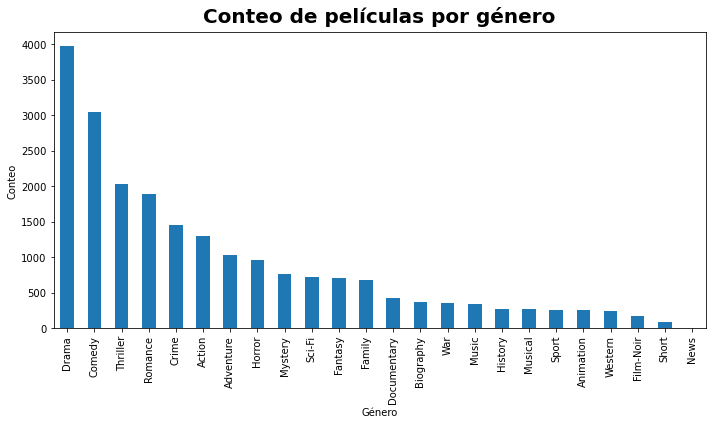

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

#Graficar los generos en cada pelicula 

genre_counts = df['genres'].explode().value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
#sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.title('Conteo de películas por género', pad=10, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

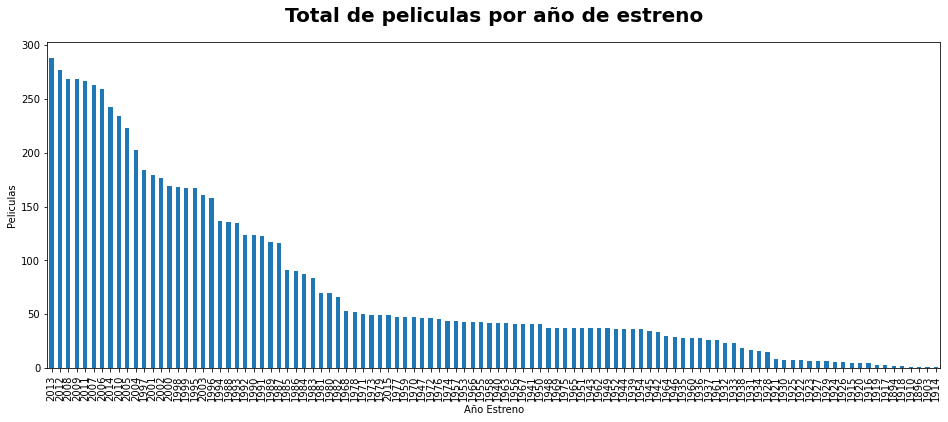

In [44]:
plt.figure(figsize=(16,6))
counts = df["year"].value_counts()
counts.plot(kind='bar')
plt.xlabel("Año Estreno")
plt.ylabel("Peliculas")
plt.title("Total de peliculas por año de estreno", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

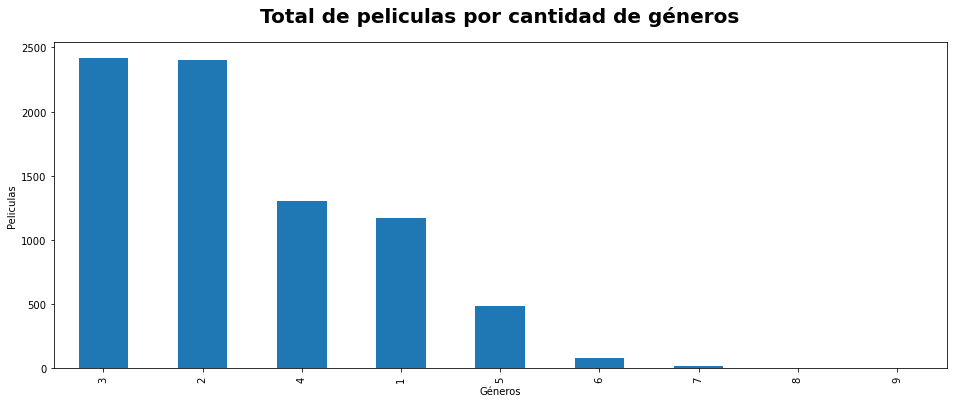

In [56]:
df['genre_count'] = df['genres'].apply(lambda x: len(x))

plt.figure(figsize=(16,6))
counts = df["genre_count"].value_counts()
counts.plot(kind='bar')
plt.xlabel("Géneros")
plt.ylabel("Peliculas")
plt.title("Total de peliculas por cantidad de géneros", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

## Resultado del análisis 

Luego de hacer el análisis del set de datos, se tienen las siguientes métricas 

* Existe un total de 24 géneros diferentes dentro del set de datos, siendo Drama y Comedia los géneros con mayoria de peliculas.
* El set de datos se compone por películas que van desde el año 1914 al año 2013.
* La mayoria de películas cuenta con 3 o 2 géneros decntro de su clasifiación.

## Preprocesamiento de datos

In [77]:
# Funciones oara el proceso 
from sklearn.metrics import precision_score, recall_score

a_accuracy = []
a_precision = []
a_recall = []
a_roc_auc = []
a_modelo = []

def evaluacion_prediccion_clasificacion (model, xtrain, ytrain, xtest, ytest, modelo):
    model.fit(xtrain,ytrain)
    y_test_pred = model.predict(xtest)
    #Métricas del modelo
    accuracy = np.mean(ytest == y_test_pred)
    precision = precision_score(ytest, y_test_pred, average='macro')
    recall = recall_score(ytest, y_test_pred, average='macro')
    roc_auc = roc_auc_score(ytest, y_test_pred, average='macro')
    
    a_accuracy.append(accuracy)
    a_precision.append(precision)
    a_recall.append(recall)
    a_roc_auc.append(roc_auc)
    a_modelo.append(modelo)
    
    print(f"accuracy de {modelo} es:",accuracy)
    print(f"precision de {modelo} es:",precision)
    print(f"recall de {modelo} es:",recall)
    print(f"roc_auc de {modelo} es:",roc_auc)
    
    
def gdd(x):
    a=x.split()
    return len(a)


import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [60]:
# Limepieza del plot de la pelicula

from tqdm import tqdm
preprocessed_plot = []

for sentance in df['plot'].values:
    sentance = decontracted(sentance)
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_plot.append(sentance.strip())

df['preprocessed_plot']=preprocessed_plot

In [71]:
# Vetorizaciòn 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

le = MultiLabelBinarizer()
y_genres = le.fit_transform(df['genres'])
Y= np.array(y_genres)


# Vec torizaciòn y TfIdf

tfidf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False)
vect = CountVectorizer(ngram_range=(1, 2) )
X_dtm_1 = vect.fit_transform(df['preprocessed_plot'])
X_dtm = tfidf_transformer.fit_transform(X_dtm_1)
X_dtm.shape 
    

(7894, 474667)

Preprocesamiento de los datos para Test 

In [93]:
df_test=dataTesting

preprocessed_plot_test = []

for sentance in df_test['plot'].values:
    sentance = decontracted(sentance)
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_plot_test.append(sentance.strip())

df_test['preprocessed_plot_test']=preprocessed_plot_test 


X_test_dtm_1 = vect.transform(df_test['preprocessed_plot_test'])
X_test_dtm = tfidf_transformer.transform(X_test_dtm_1)


In [73]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.3, random_state=42)

In [78]:
%%time
# 1. Random Forest

clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=30, random_state=42))

evaluacion_prediccion_clasificacion (clf, X_train, y_train_genres, X_test, y_test_genres, "RD")

accuracy de RD es: 0.8922013507809202
precision de RD es: 0.06822044185481912
recall de RD es: 0.031083039018972303
roc_auc de RD es: 0.5068303524230042
Wall time: 2min 57s


In [81]:
%%time
# 2. Regresiòn Logistica 
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression())

evaluacion_prediccion_clasificacion (clf, X_train, y_train_genres, X_test, y_test_genres, "LR")

accuracy de LR es: 0.8965280709159983
precision de LR es: 0.18162828914094584
recall de LR es: 0.03905318882652221
roc_auc de LR es: 0.5125132763138286
Wall time: 50.5 s


In [82]:
%%time
# 3. Arbol de decisiòn
from sklearn.tree import DecisionTreeClassifier

clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=123))

evaluacion_prediccion_clasificacion (clf, X_train, y_train_genres, X_test, y_test_genres, "DTC")

accuracy de DTC es: 0.8768115942028986
precision de DTC es: 0.37296349011445473
recall de DTC es: 0.3113989091032498
roc_auc de DTC es: 0.6177414801424609
Wall time: 16min 13s


In [83]:
%%time
# 4. SVC 
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC(random_state=123))

evaluacion_prediccion_clasificacion (clf, X_train, y_train_genres, X_test, y_test_genres, "SVC")

accuracy de SVC es: 0.8952089489235965
precision de SVC es: 0.22536585628690894
recall de SVC es: 0.03480699506760125
roc_auc de SVC es: 0.5106374249658068
Wall time: 13min 18s


In [85]:
%%time
# 5. XGBOOST 
from xgboost import XGBClassifier


clf = OneVsRestClassifier(XGBClassifier(random_state=123))

evaluacion_prediccion_clasificacion (clf, X_train, y_train_genres, X_test, y_test_genres, "XGBOOST")


accuracy de XGBOOST es: 0.905498100464331
precision de XGBOOST es: 0.5739680843328514
recall de XGBOOST es: 0.23844810530159358
roc_auc de XGBOOST es: 0.601521178503022
Wall time: 4min 36s


In [91]:
df_resultados = pd.DataFrame(
    {"Modelo":a_modelo,
    "Accuracy":a_accuracy,
    "Precision":a_precision,
    "Recall":a_recall,
    "Roc_auc":a_roc_auc})

print(df_resultados)

    Modelo  Accuracy  Precision    Recall   Roc_auc
0       RD  0.892201   0.068220  0.031083  0.506830
1       LR  0.896528   0.181628  0.039053  0.512513
2      DTC  0.876812   0.372963  0.311399  0.617741
3      SVC  0.895209   0.225366  0.034807  0.510637
4  XGBOOST  0.905498   0.573968  0.238448  0.601521


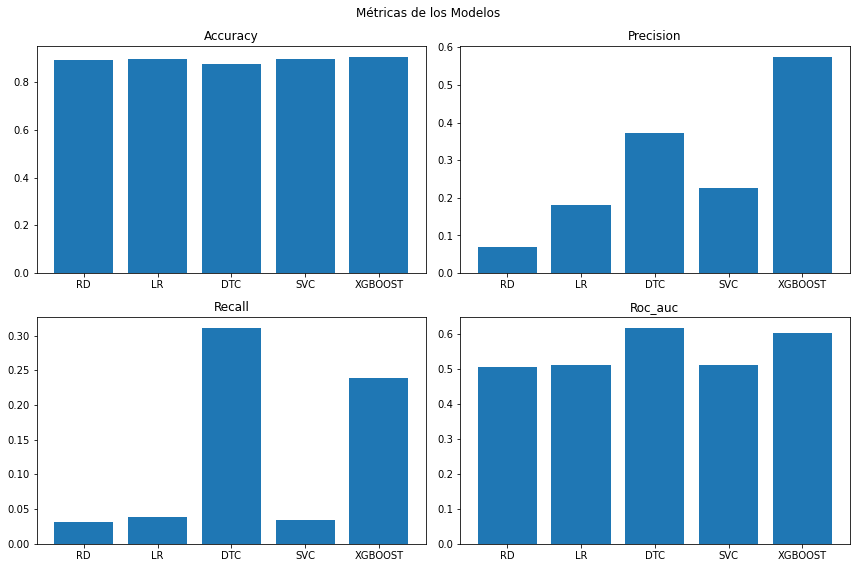

In [90]:

# Crear subplots para los cuatro gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Métricas de los Modelos")

# Gráfico para Accuracy
axs[0, 0].bar(df_resultados["Modelo"], df_resultados["Accuracy"])
axs[0, 0].set_title("Accuracy")

# Gráfico para Precision
axs[0, 1].bar(df_resultados["Modelo"], df_resultados["Precision"])
axs[0, 1].set_title("Precision")

# Gráfico para Recall
axs[1, 0].bar(df_resultados["Modelo"], df_resultados["Recall"])
axs[1, 0].set_title("Recall")

# Gráfico para Roc_auc
axs[1, 1].bar(df_resultados["Modelo"], df_resultados["Roc_auc"])
axs[1, 1].set_title("Roc_auc")

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## Calibración del modelo

Basándonos en los resultados obtenidos de cada uno de los modelos, optaremos por ajustar los hiperparámetros del modelo de regresión logística. A pesar de que este modelo no muestra las métricas más sobresalientes, dispone de hiperparámetros valiosos para la clasificación multiclase, como son 'solver' y 'multi_class'. Para realizar este ajuste, utilizaremos GridSearch, cuyo objetivo es buscar y seleccionar los hiperparámetros más óptimos.

In [274]:
from sklearn.model_selection import GridSearchCV


# Modelo Base 
base_lr = OneVsRestClassifier(LogisticRegression(random_state=123))

# Definir los hiperparámetros que se quieren optimizar
param_grid = {
    'estimator__C': [0.1, 1, 10], # Puedes modificar esta lista según tus necesidades
    'estimator__max_iter': [100, 200, 300], # Puedes modificar esta lista según tus necesidades
    'estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'estimator__multi_class': ['auto', 'ovr', 'multinomial']
}


grid_lr = GridSearchCV(base_lr, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train_genres)
print('Los mejores hiperparámetros encontrados son:', grid_lr.best_params_)
y_pred_genres = grid_lr.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Los mejores hiperparámetros encontrados son: {'estimator__C': 0.1, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__solver': 'newton-cg'}


0.8755794804013032

### Análisis de hiperparámetros


* **random_state** =123: Este hiperparámetro es una semilla que se utiliza para reproducir el mismo resultado cada vez que se ejecuta el modelo.

* **solver**='saga': El solver es el algoritmo que se utiliza para la optimización del problema. 'Saga' es un algoritmo eficiente para grandes conjuntos de datos y soporta la opción de regularización L1.

* **max_iter**=500: Este hiperparámetro define el número máximo de iteraciones que el solver puede realizar para encontrar los coeficientes óptimos.

* **C**=1: C es el parámetro de regularización inversa en la regresión logística. Valores más pequeños especifican una regularización más fuerte, lo que ayuda a prevenir el sobreajuste. C=1 implica que se está aplicando una regularización moderada.

* **n_jobs**=-1: Este hiperparámetro se refiere a la cantidad de CPU que se utilizarán para el cálculo. El valor -1 significa que se utilizarán todas las CPUs disponibles.

* **multi_class**='multinomial': Este hiperparámetro determina la estrategia que se utiliza para manejar problemas de clasificación multiclase. 'Multinomial' significa que se utiliza la pérdida de entropía cruzada, que se considera una buena opción cuando las clases son más de dos.


## Entrenamiento del modelo

In [94]:
lr = OneVsRestClassifier(LogisticRegression(random_state=123, solver='newton-cg', max_iter=100, C=0.1, n_jobs=-1)) 
lr.fit(X_train, y_train_genres)

evaluacion_prediccion_clasificacion (lr, X_train, y_train_genres, X_test, y_test_genres, "LR Final")

accuracy de LR Final es: 0.8931862952019136
precision de LR Final es: 0.026954177897574122
recall de LR Final es: 0.03395585738539898
roc_auc de LR Final es: 0.5078119617181683


In [101]:
%%time

lr = OneVsRestClassifier(LogisticRegression(random_state=123, solver='saga', max_iter=500, C=1, n_jobs=-1, multi_class='multinomial'))
lr.fit(X_train, y_train_genres)

evaluacion_prediccion_clasificacion (lr, X_train, y_train_genres, X_test, y_test_genres, "LR Final")



accuracy de LR Final es: 0.8996060222316027
precision de LR Final es: 0.3393923203531855
recall de LR Final es: 0.05344844144587737
roc_auc de LR Final es: 0.5190671197118623
Wall time: 2min 45s


In [102]:
# transformación variión variables predictoras X del conjunto de test

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = lr.predict_proba(X_test_dtm)

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_clasificacion_final_lr.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.108487,0.120457,0.025917,0.030813,0.410569,0.142346,0.029240,0.565981,0.054071,0.118756,...,0.032663,0.089862,0.000793,0.558450,0.052294,0.010423,0.025367,0.188643,0.025383,0.029449
4,0.123335,0.051605,0.026542,0.124297,0.300854,0.268575,0.054849,0.776295,0.043270,0.035525,...,0.030424,0.044396,0.000834,0.108104,0.031253,0.011983,0.032074,0.215951,0.051143,0.029007
5,0.110048,0.043838,0.016175,0.041391,0.188125,0.618348,0.026864,0.792004,0.028486,0.035994,...,0.022562,0.331713,0.000812,0.162713,0.069393,0.009213,0.023167,0.557367,0.030360,0.023688
6,0.113051,0.085543,0.017761,0.043561,0.231886,0.090561,0.028633,0.707606,0.046008,0.054848,...,0.031504,0.095834,0.000804,0.296638,0.089291,0.008374,0.031137,0.352510,0.056197,0.019777
7,0.067038,0.056895,0.022630,0.026028,0.188575,0.147430,0.027610,0.406661,0.049602,0.106847,...,0.025691,0.169156,0.000803,0.181602,0.335536,0.010200,0.017083,0.431617,0.023203,0.019434


Al evaluar el rendimiento del modelo en el conjunto de datos de validación, utilizamos diversas métricas. La precisión, que es la relación entre los verdaderos positivos y la suma de los verdaderos positivos y los falsos positivos, fue de 0.339, indicando que el modelo tiene cierto grado de error al predecir las clases. El recall, que es la relación entre los verdaderos positivos y la suma de los verdaderos positivos y los falsos negativos, fue de 0.053, indicando que el modelo no es muy eficaz para detectar los verdaderos positivos. La puntuación de la curva ROC-AUC, que mide la capacidad de clasificación de un modelo a todas las clasificaciones de umbral, fue de 0.519, lo que indica que el modelo tiene un rendimiento ligeramente mejor que el azar. Sin embargo, la métrica más destacada es la exactitud (accuracy), que mide la proporción de predicciones correctas entre el total de predicciones realizadas, y en este caso fue de 0.899, lo que indica que el modelo es bastante preciso en sus predicciones.

# Generacion de modelo para API

In [104]:
import pickle

# Guardamos el modelo entrenado en un archivo .pkl
with open('modelo__clasificacion_entrenado.pkl', 'wb') as file:
    pickle.dump(lr, file)
    
# Guardar el objeto vect en un archivo
with open('vect.pkl', 'wb') as f:
    pickle.dump(vect, f)

# Guardar el objeto tfidf_transformer en un archivo
with open('tfidf_transformer.pkl', 'wb') as f:
    pickle.dump(tfidf_transformer, f)